<a href="https://colab.research.google.com/github/AlirezaZarrinmehr/Intro-to-Data-Science/blob/main/IST_687_Project_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Science - Final Project 

##### Copyright 2022, Group 4


###1-Importing the libraries:

In [2]:
# install.packages('arules')
# install.packages('arulesViz')
# install.packages('MASS')
# install.packages('maps')
# install.packages('ggplot2')
# install.packages('ggmap')
# install.packages('mapproj')
# install.packages('imputeTS')
# install.packages('caret')
# install.packages('arulesViz')
# install.packages('arules')
# install.packages('kernlab')
library(tidyverse)
library(MASS)
library(imputeTS)
library(ggplot2)
library(maps)
library(ggmap)
library(mapproj)
library(kernlab)

###2-Storing the data in df dataset


In [3]:
df<- read_csv('https://intro-datascience.s3.us-east-2.amazonaws.com/HMO_data.csv')
head(df)

Rows: 7582 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (6): X, age, bmi, children, hypertension, cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746
2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602
3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576
4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562
5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836
7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842


###3-Converting the data type to factor:


In [4]:
df$children <- factor(df$children)
df$smoker <- factor(df$smoker)
df$location_type <- factor(df$location_type)
df$education_level <- factor(df$education_level)
df$yearly_physical <- factor(df$yearly_physical)
df$exercise <- factor(df$exercise)
df$married <- factor(df$married)
df$location <- factor(df$location)
df$gender <- factor(df$gender)

head(df)
dim(df)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746
2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602
3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576
4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562
5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836
7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842


[1] 7582   14

###4-Checking for NA values:


In [5]:
print('Number of null values in age column')
dim(df%>%filter(is.na(df$age)==TRUE))
print('Number of null values in bmi column')
dim(df%>%filter(is.na(df$bmi)==TRUE))
print('Number of null values in children column')
dim(df%>%filter(is.na(df$children)==TRUE))
print('Number of null values in cost column')
dim(df%>%filter(is.na(df$cost)==TRUE))
print('Number of null values in education_level column')
dim(df%>%filter(is.na(df$education_level)==TRUE))
print('Number of null values in exercise column')
dim(df%>%filter(is.na(df$exercise)==TRUE))
print('Number of null values in gender column')
dim(df%>%filter(is.na(df$gender)==TRUE))
print('Number of null values in hypertension column')
dim(df%>%filter(is.na(df$hypertension)==TRUE))
print('Number of null values in location column')
dim(df%>%filter(is.na(df$location)==TRUE))
print('Number of null values in location_type column')
dim(df%>%filter(is.na(df$location_type)==TRUE))
print('Number of null values in married column')
dim(df%>%filter(is.na(df$married)==TRUE))
print('Number of null values in smoker column')
dim(df%>%filter(is.na(df$smoker)==TRUE))
print('Number of null values in yearly_physical column')
dim(df%>%filter(is.na(df$yearly_physical)==TRUE))

[1] "Number of null values in age column"


[1]  0 14

[1] "Number of null values in bmi column"


[1] 78 14

[1] "Number of null values in children column"


[1]  0 14

[1] "Number of null values in cost column"


[1]  0 14

[1] "Number of null values in education_level column"


[1]  0 14

[1] "Number of null values in exercise column"


[1]  0 14

[1] "Number of null values in gender column"


[1]  0 14

[1] "Number of null values in hypertension column"


[1] 80 14

[1] "Number of null values in location column"


[1]  0 14

[1] "Number of null values in location_type column"


[1]  0 14

[1] "Number of null values in married column"


[1]  0 14

[1] "Number of null values in smoker column"


[1]  0 14

[1] "Number of null values in yearly_physical column"


[1]  0 14

###5-Interpolating the Null values: 

In [6]:
df$bmi <- na_interpolation(df$bmi)
df$hypertension <- as.numeric(df$hypertension)
df$hypertension <- na_interpolation(df$hypertension)
df$hypertension <- as.factor(df$hypertension)
#removing the rows with interpolation of 0.5
df <- df%>%filter(hypertension != 0.5)
print('Number of null values in hypertension column')
dim(df%>%filter(is.na(df$hypertension)==TRUE))
print('Number of null values in bmi column')
dim(df%>%filter(is.na(df$bmi)==TRUE))
head(df)

[1] "Number of null values in hypertension column"


[1]  0 14

[1] "Number of null values in bmi column"


[1]  0 14

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746
2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602
3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576
4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562
5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836
7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842


###6-Adding the Expensive Column:

In [7]:
df$expensive <- 1
df$expensive[df$cost < 5000] <- 0
df$expensive <- as.factor(df$expensive)
head(df)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,expensive
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746,0
2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602,0
3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576,0
4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562,1
5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836,0
7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842,0


###7-Get the number of expensive and inexpensive obsservation

In [8]:
print('Table of expensive:')
table(df$expensive)
# from this output we can say that the there are 2360 expensive and 5222 inexpensive

[1] "Table of expensive:"



   0    1 
5759 1793 

###8- Creating Histogram and Boxplot of numeric variables:

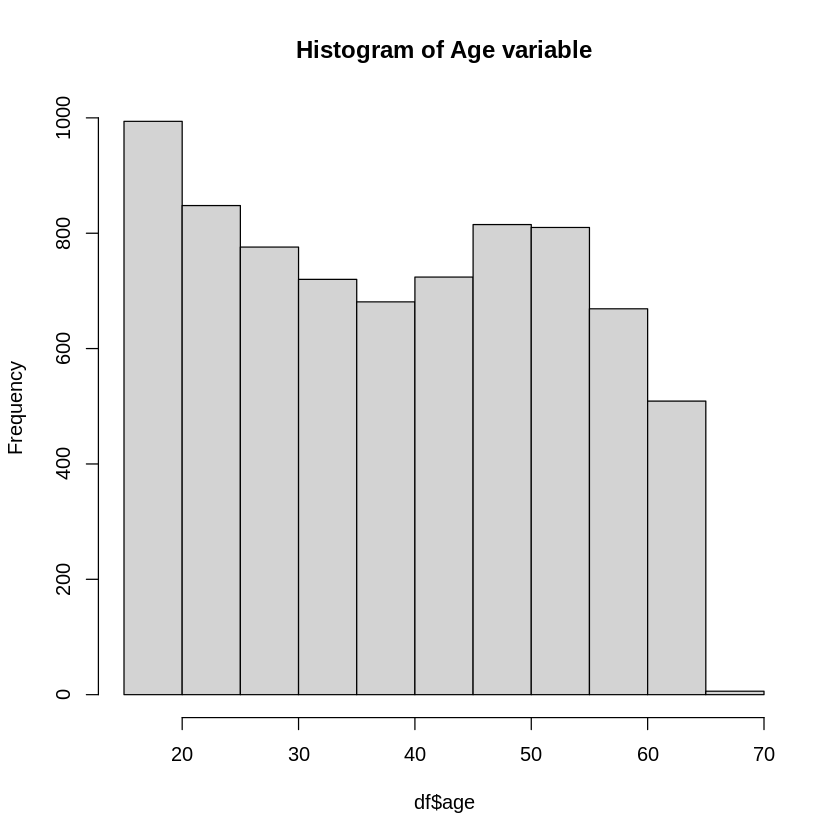

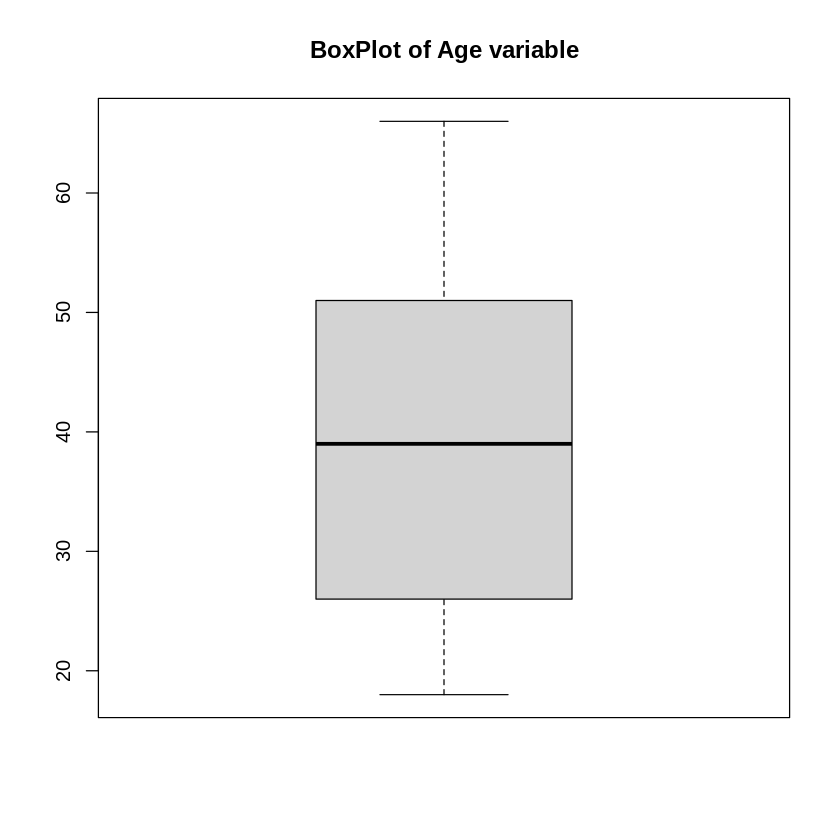

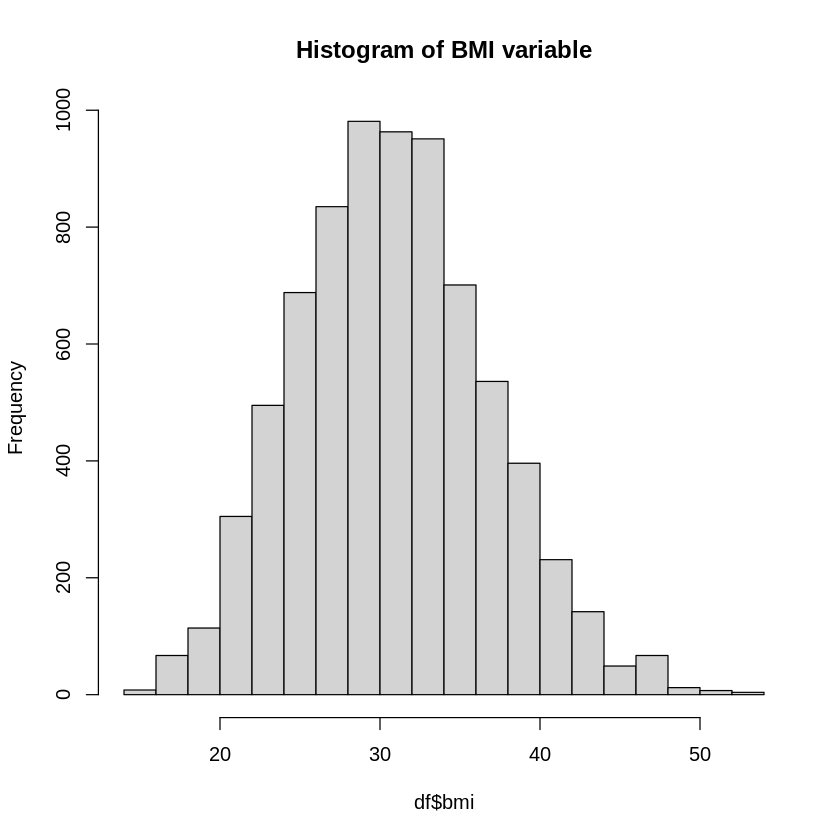

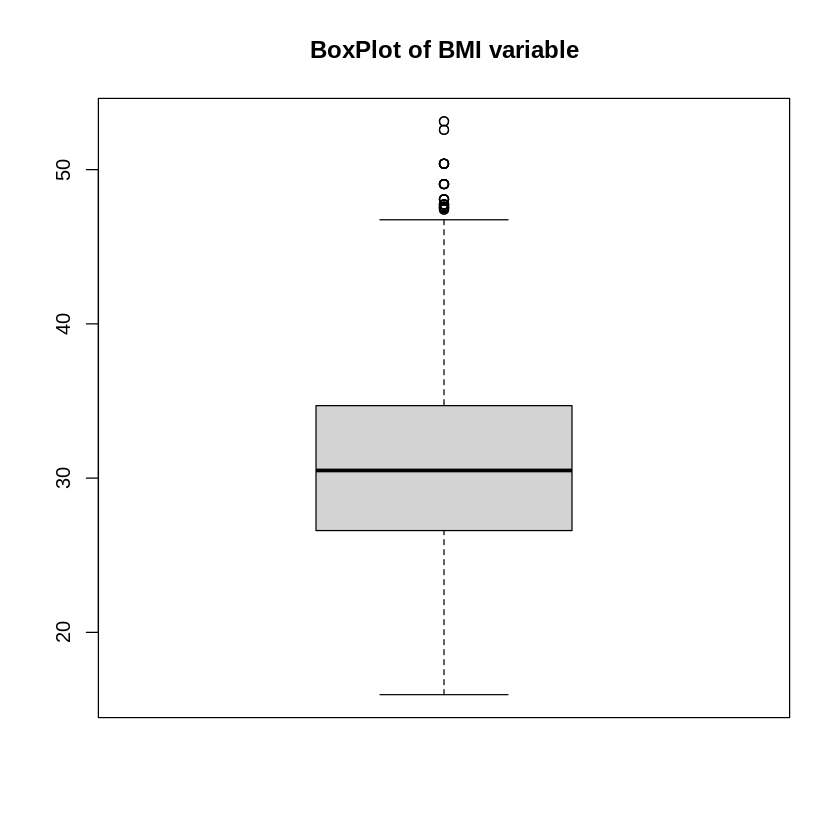

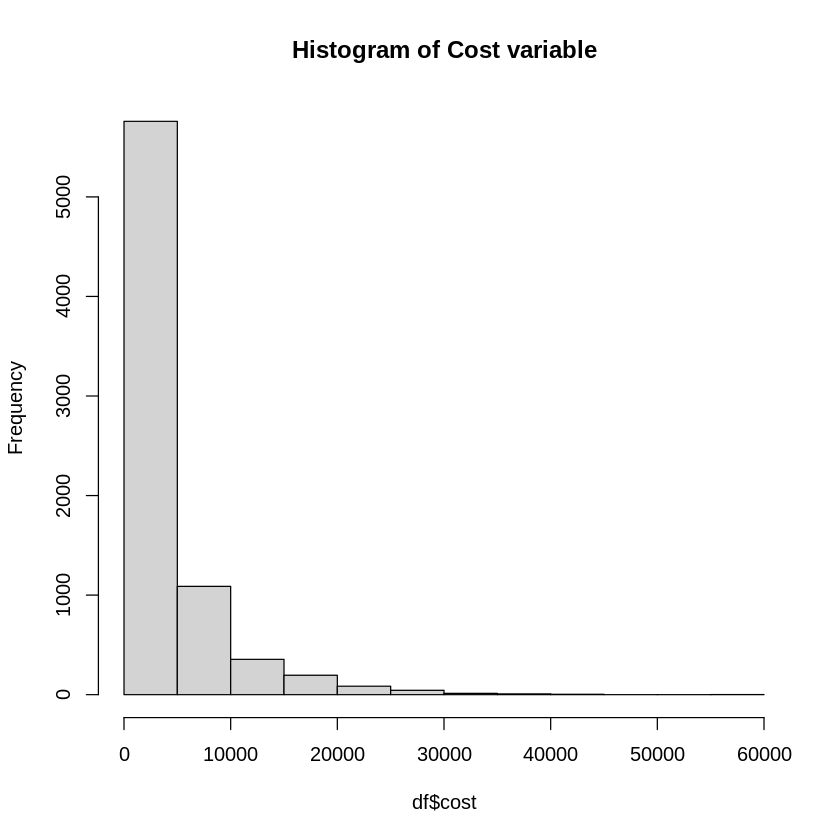

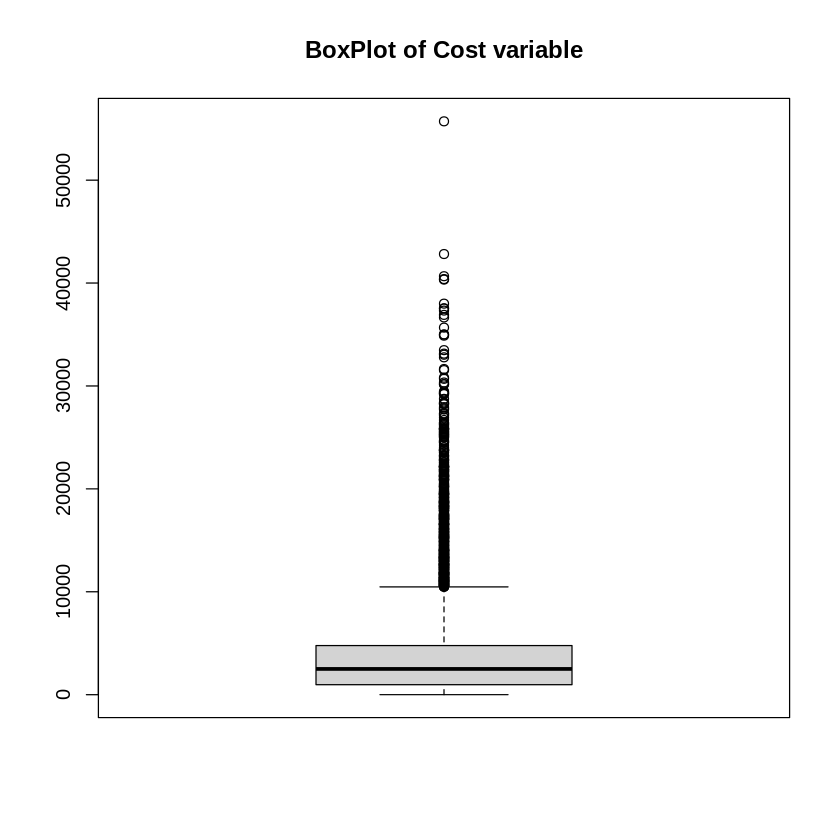

In [9]:
hist(df$age, main= "Histogram of Age variable")
boxplot(df$age, main = "BoxPlot of Age variable")

hist(df$bmi, main= "Histogram of BMI variable")
boxplot(df$bmi, main = "BoxPlot of BMI variable")

hist(df$cost, main= "Histogram of Cost variable")
boxplot(df$cost, main = "BoxPlot of Cost variable")

###9-Creating the Table of Categorical variables:


In [10]:
print('Table of education_level:')
table(df$education_level)
print('Table of Children:')
table(df$children)
print('Table of hypertension:')
table(df$hypertension)
print('Table of exercise:')
table(df$exercise)
print('Table of expensive:')
table(df$expensive)
print('Table of gender:')
table(df$gender)
print('Table of location:')
table(df$location)
print('Table of location_type:')
table(df$location_type)
print('Table of married:')
table(df$married)
print('Table of smoker:')
table(df$smoker)
print('Table of yearly_physical:')
table(df$yearly_physical)

[1] "Table of education_level:"



         Bachelor            Master No College Degree               PhD 
             4558              1528               757               709 

[1] "Table of Children:"



   0    1    2    3    4    5 
3248 1765 1361  936  130  112 

[1] "Table of hypertension:"



   0  0.5    1 
6047    0 1505 

[1] "Table of exercise:"



    Active Not-Active 
      1883       5669 

[1] "Table of expensive:"



   0    1 
5759 1793 

[1] "Table of gender:"



female   male 
  3647   3905 

[1] "Table of location:"



  CONNECTICUT      MARYLAND MASSACHUSETTS    NEW JERSEY      NEW YORK 
          607           743           463           496           544 
 PENNSYLVANIA  RHODE ISLAND 
         3998           701 

[1] "Table of location_type:"



Country   Urban 
   1893    5659 

[1] "Table of married:"



    Married Not_Married 
       5042        2510 

[1] "Table of smoker:"



  no  yes 
6079 1473 

[1] "Table of yearly_physical:"



  No  Yes 
5679 1873 

None of observed variables have to be normal in linear regression analysis, which includes t-test and ANOVA. The errors after modeling, however, should be normal to draw a valid conclusion by hypothesis testing


###10-Creating a Geographic Map:

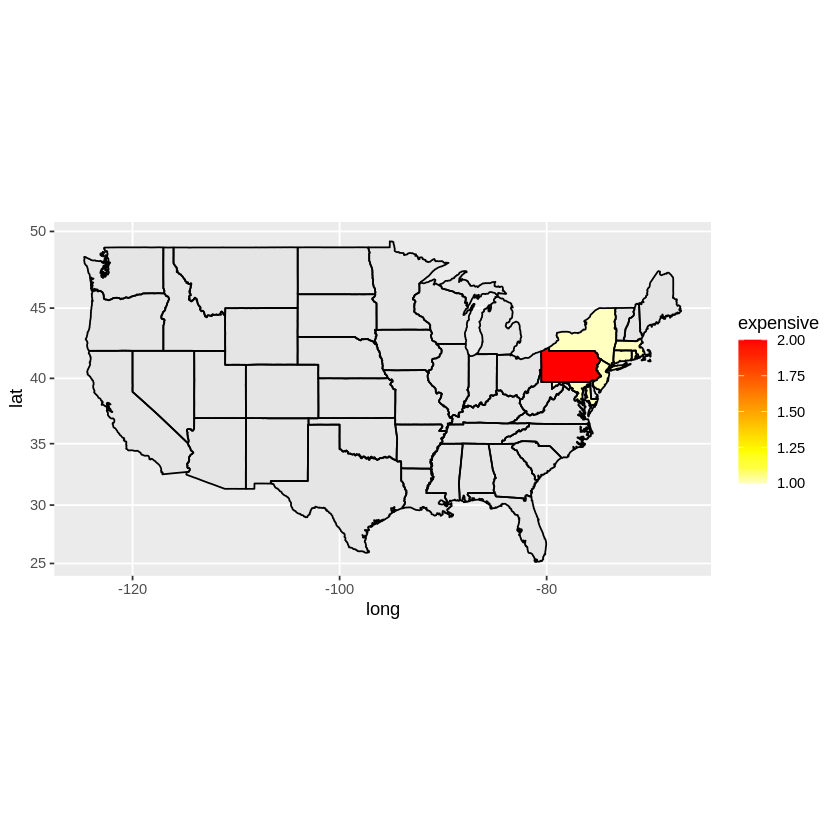

In [11]:
dfmap <- df 
dfmap$region <- tolower(dfmap$location)

dfmap$expensive <- as.numeric(dfmap$expensive)

states <- map_data("state")
map.dfmap <- merge(states,dfmap, by="region", all.x=T)
map.dfmap <- map.dfmap[order(map.dfmap$order),]
ggplot(map.dfmap, aes(x=long,y=lat,group=group))+
  geom_polygon(aes(fill=expensive))+
  geom_path()+ 
  scale_fill_gradientn(colours=rev(heat.colors(10)),na.value="grey90")+
  coord_map()

dfmap$expensive <- as.factor(dfmap$expensive)

###11-Creating expensive & none-expensive subsets:

In [12]:
df_exp <- df[df$expensive == 1,]
df_cheap <- df[df$expensive == 0,]
nrow(df_exp)
nrow(df_cheap)

[1] 1793

[1] 5759

###12-Creating bar plot and boxplots of all the predictor variables in relation to expensive variable



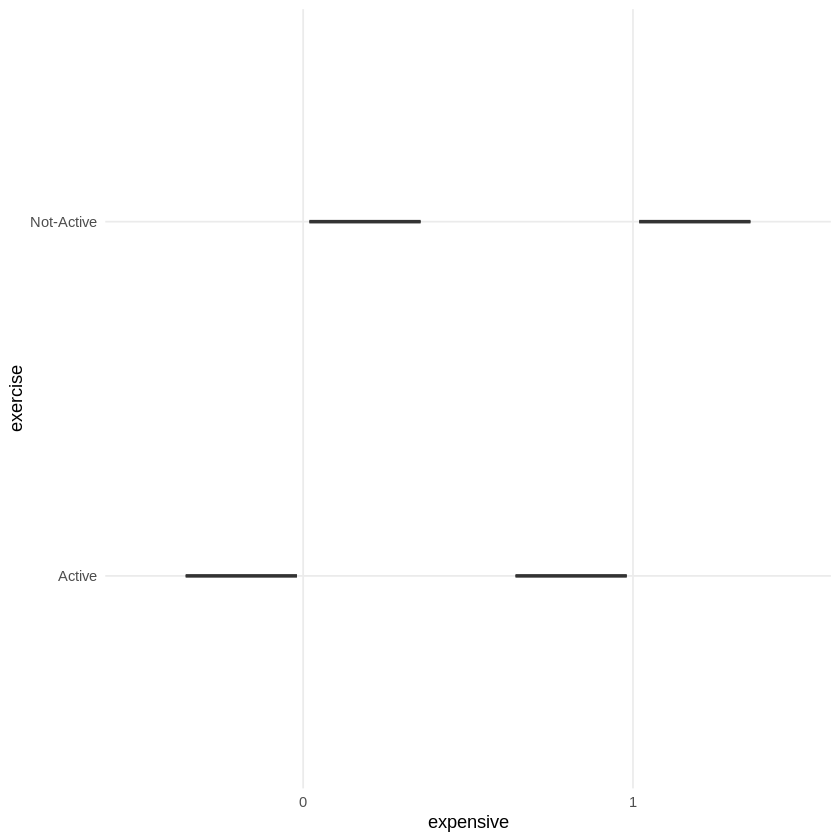

In [13]:
# barplot(df_exp$cost)
# barplot(df_cheap$cost)
# ggplot(df, aes(x=age), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=bmi), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=children), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=smoker), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=location), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=location_type), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=education_level), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=yearly_physical), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=excercise), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=married), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=hypertension), y=expensive) +   geom_bar(stat="count")
# ggplot(df, aes(x=gender), y=expensive) +   geom_bar(stat="count")

# boxplot(age ~  expensive, data = df)

ggplot(df) + aes(x = expensive, y = exercise) + 
      geom_boxplot() + theme_minimal()

#2-Linear Regression:

###2.1-Generate a list of cases to include in the training data

In [14]:
library(caret)
set.seed(111)
trainListlm <- createDataPartition(y=df$cost, p=.70, list=FALSE)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




###2.2-Create train and test data set:

In [15]:
trainDatalm <- df [trainListlm,]
testDatalm <-  df [-trainListlm,]

###What are the significant variable.

In [16]:
lmodelFinalsignif <- lm(cost ~ . ,data=trainDatalm)
summary(lmodelFinalsignif)


Call:
lm(formula = cost ~ ., data = trainDatalm)

Residuals:
   Min     1Q Median     3Q    Max 
 -8992  -1005    -71    776  41287 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -5.576e+03  2.904e+02 -19.202  < 2e-16 ***
X                                 4.871e-06  7.420e-06   0.657 0.511494    
age                               6.403e+01  2.861e+00  22.382  < 2e-16 ***
bmi                               1.161e+02  6.652e+00  17.453  < 2e-16 ***
children1                         3.630e+02  9.951e+01   3.648 0.000267 ***
children2                         6.633e+02  1.079e+02   6.149 8.35e-10 ***
children3                         5.045e+02  1.236e+02   4.081 4.54e-05 ***
children4                         4.413e+02  2.977e+02   1.482 0.138296    
children5                         7.820e+02  3.162e+02   2.473 0.013427 *  
smokeryes                         4.465e+03  1.204e+02  37.086  < 2e-16 ***
locationMARYLAN

###2.1-Constructing the linear model:


In [17]:
# # lmodel1 <- lm(cost ~.,data=sorted_trainDataLM1)
# # summary(lmodel1)

# lmodel1 <- lm(cost ~ age+ bmi+ children+ smoker+ location+ exercise + yearly_physical+ hypertension + married ,data=df)
# summary(lmodel1)
lmodelFinal <- lm(cost ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension ,data=trainDatalm)
summary(lmodelFinal)


Call:
lm(formula = cost ~ age + bmi + children + smoker + location + 
    exercise + hypertension, data = trainDatalm)

Residuals:
   Min     1Q Median     3Q    Max 
-12005  -1484   -330   1031  41635 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -9208.208    313.449 -29.377  < 2e-16 ***
age                      99.745      3.260  30.601  < 2e-16 ***
bmi                     185.922      7.657  24.280  < 2e-16 ***
children1               392.258    117.823   3.329 0.000877 ***
children2               887.175    127.591   6.953    4e-12 ***
children3               567.379    146.040   3.885 0.000104 ***
children4              1180.974    352.016   3.355 0.000800 ***
children5               852.957    374.542   2.277 0.022806 *  
smokeryes              7732.234    114.839  67.331  < 2e-16 ***
locationMARYLAND       -280.146    214.058  -1.309 0.190681    
locationMASSACHUSETTS   -90.565    247.243  -0.366 0.714155    
locationNEW J

###2.4-Prediction for the test data set:

In [18]:
# PredtestData<- data.frame(predict(lmodel1, sorted_testDataLM1))
# PredtestData$Actual_value <- sorted_testDataLM1$cost
# head(PredtestData)
predictValues <- predict(lmodelFinal, newdata=testDatalm)
PV <- data.frame(predictValues)
head(PV)

,predictValues
,<dbl>
1,1630.2523
2,4366.4945
3,9496.3808
4,3478.3927
5,587.7675
6,4518.0574


###2.5-Add expensive column:

In [19]:
PV$expensive <- 1
PV$expensive[PV$predictValues < 5000] <- 0
PV$expensive <- factor(PV$expensive)
head(PV)

,predictValues,expensive
,<dbl>,<fct>
1,1630.2523,0
2,4366.4945,0
3,9496.3808,1
4,3478.3927,0
5,587.7675,0
6,4518.0574,0


###2.7-Calculate the confusion matrix:

In [20]:
table(PV$expensive,testDatalm$expensive)

   
       0    1
  0 1469  123
  1  257  415

###Calculate the accuracy:

In [21]:
sum(diag(table(PV$expensive, testDatalm$expensive)))/sum(table(PV$expensive, testDatalm$expensive))

[1] 0.8321555

###2.8-Import the sample data:

In [23]:
sampleData <- read_csv("/content/HMO_TEST_data_sample.csv")
head(sampleData)

Rows: 20 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (5): X, age, bmi, children, hypertension

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
8,37,27.74,3,no,NEW JERSEY,Urban,Bachelor,Yes,Not-Active,Not_Married,0,female
10,60,25.84,0,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
20,30,35.30,0,yes,NEW YORK,Country,PhD,No,Not-Active,Married,0,male
24,34,31.92,1,yes,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
30,31,36.30,2,yes,PENNSYLVANIA,Urban,Master,Yes,Not-Active,Not_Married,0,male
31,22,35.60,0,yes,CONNECTICUT,Country,Bachelor,No,Not-Active,Not_Married,1,male


###2.9-Changing the characters to factors:

In [24]:
sampleData <- mutate_if(sampleData,is.character, factor)
sampleData$children <- as.factor(sampleData$children)
sampleData$hypertension <- as.factor(sampleData$hypertension)
head(sampleData)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
8,37,27.74,3,no,NEW JERSEY,Urban,Bachelor,Yes,Not-Active,Not_Married,0,female
10,60,25.84,0,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
20,30,35.30,0,yes,NEW YORK,Country,PhD,No,Not-Active,Married,0,male
24,34,31.92,1,yes,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
30,31,36.30,2,yes,PENNSYLVANIA,Urban,Master,Yes,Not-Active,Not_Married,0,male
31,22,35.60,0,yes,CONNECTICUT,Country,Bachelor,No,Not-Active,Not_Married,1,male


###2.10-Training the linear model with the whole data set:

In [25]:
lmodelFinal2 <- lm(cost ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension ,data=df)
summary(lmodelFinal2)


Call:
lm(formula = cost ~ age + bmi + children + smoker + location + 
    exercise + hypertension, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-12019  -1474   -340   1008  41812 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -9127.607    257.150 -35.495  < 2e-16 ***
age                     102.117      2.637  38.731  < 2e-16 ***
bmi                     181.255      6.239  29.050  < 2e-16 ***
children1               297.351     95.320   3.119 0.001818 ** 
children2               852.465    104.110   8.188 3.09e-16 ***
children3               478.194    120.076   3.982 6.89e-05 ***
children4              1209.542    288.282   4.196 2.75e-05 ***
children5               740.015    310.183   2.386 0.017070 *  
smokeryes              7672.105     93.960  81.653  < 2e-16 ***
locationMARYLAND       -135.553    176.136  -0.770 0.441564    
locationMASSACHUSETTS    -8.957    198.729  -0.045 0.964050    
locationNEW JERSEY    

###2.11-Prediction for sample data:

In [26]:
predFinal2 <- predict(lmodelFinal2, newdata=sampleData)
PV2 <- data.frame(predFinal2)
PV2

,predFinal2
,<dbl>
1,2546.7602
2,3949.1742
3,10742.1846
4,10365.6079
5,11408.2669
6,9847.2728
7,10428.2051
8,11318.5622
9,749.2737


###2.12-Add index:

In [27]:
PV2$X <- sampleData$X
head(PV2)

,predFinal2,X
,<dbl>,<dbl>
1,2546.760,8
2,3949.174,10
3,10742.185,20
4,10365.608,24
5,11408.267,30
6,9847.273,31


###2.13-Add expensive column:

In [28]:
PV2$expensive <- 1
PV2$expensive[PV2$predFinal2 < 5000] <- 0
PV2$expensive <- factor(PV2$expensive)
head(PV2)

,predFinal2,X,expensive
,<dbl>,<dbl>,<fct>
1,2546.760,8,0
2,3949.174,10,0
3,10742.185,20,1
4,10365.608,24,1
5,11408.267,30,1
6,9847.273,31,1


###2.14-Changing the expensive column values from 0/1 to FALSE/TRUE

In [29]:
PV3 <- PV2
PV3$expensive <- as.character(PV3$expensive)
PV3$expensive[PV3$expensive == '1'] <- 'TRUE'
PV3$expensive[PV3$expensive == '0'] <- 'FALSE'
PV3$expensive <- as.factor(PV3$expensive)
PV3 <- (PV3[, -1])
head(PV3)

,X,expensive
,<dbl>,<fct>
1,8,FALSE
2,10,FALSE
3,20,TRUE
4,24,TRUE
5,30,TRUE
6,31,TRUE


###2.15-Importing the sample solution:

In [30]:
sampleSolution <- read.csv("/content/HMO_TEST_data_sample_solution.csv")
sampleSolution

X,expensive
<int>,<lgl>
8,TRUE
10,TRUE
20,FALSE
24,FALSE
30,FALSE
31,TRUE
35,TRUE
39,TRUE
41,FALSE


###2.16-Calculating the accuracy for the sample data:

In [31]:
table(sampleSolution$expensive, PV3$expensive)
sum(diag(table(sampleSolution$expensive, PV3$expensive)))/sum(table(sampleSolution$expensive, PV3$expensive))

       
        FALSE TRUE
  FALSE     7    5
  TRUE      4    4

[1] 0.55

###2.17-Calculating the sensitivity:

#3-SVM:

###3.1-Remove the cost column:

In [34]:
dfsvm <- df 
dfsvm <- subset(dfsvm, select = c(-14))
# dfsvm$X <- as.numeric(dfsvm$X)
# dfsvm$age <- as.numeric(dfsvm$age)
# dfsvm$bmi <- as.numeric(dfsvm$bmi)
# dfsvm$children <- as.numeric(dfsvm$children)
# dfsvm$hypertension <- as.numeric(dfsvm$hypertension)
head(dfsvm)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,expensive
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,0
2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,0
3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,0
4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,1
5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,0
7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,0


###3.2-Generate a list of cases to include in the training data:

In [35]:
library(caret)
set.seed(111)
trainListSVM <- createDataPartition(y=dfsvm$expensive, p=.70, list=FALSE)

###3.3-Create train and test data set:

In [36]:
trainDataSVM <- dfsvm [trainListSVM,]
testDataSVM <-  dfsvm [-trainListSVM,]

###3.4-Constructing the SVM model:

In [37]:
svmModel <- ksvm(expensive ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension , data = trainDataSVM, C = 5, cross = 3, prob.model = TRUE)
#Investigate the SVM model:
svmModel

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.185349781513556 

Number of Support Vectors : 1482 

Objective Function Value : -6081.527 
Training error : 0.103064 
Cross validation error : 0.12046 
Probability model included. 

###3.5-Prediction for the test data set using the SVM model:

In [38]:
predSVM <- predict(svmModel, newdata = testDataSVM, type = "response")

###3.6-Calculate	the confusion	matrix and	the accuracy	:

In [39]:
confusionMatrix(predSVM, testDataSVM$expensive)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1677  228
         1   50  309
                                         
               Accuracy : 0.8772         
                 95% CI : (0.863, 0.8905)
    No Information Rate : 0.7628         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6169         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9710         
            Specificity : 0.5754         
         Pos Pred Value : 0.8803         
         Neg Pred Value : 0.8607         
             Prevalence : 0.7628         
         Detection Rate : 0.7407         
   Detection Prevalence : 0.8414         
      Balanced Accuracy : 0.7732         
                                         
       'Positive' Class : 0              
                                         

###3.7-Import the sample data:

In [40]:
sampleData <- read_csv("/content/HMO_TEST_data_sample.csv")
head(sampleData)

Rows: 20 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (5): X, age, bmi, children, hypertension

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
8,37,27.74,3,no,NEW JERSEY,Urban,Bachelor,Yes,Not-Active,Not_Married,0,female
10,60,25.84,0,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
20,30,35.30,0,yes,NEW YORK,Country,PhD,No,Not-Active,Married,0,male
24,34,31.92,1,yes,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
30,31,36.30,2,yes,PENNSYLVANIA,Urban,Master,Yes,Not-Active,Not_Married,0,male
31,22,35.60,0,yes,CONNECTICUT,Country,Bachelor,No,Not-Active,Not_Married,1,male


###3.8-Changing the characters to factors:

In [41]:
SampleDataSVM <- mutate_if(sampleData,is.character, factor)
# SampleDataSVM$X <- as.numeric(SampleDataSVM$X)
# SampleDataSVM$age <- as.numeric(SampleDataSVM$age)
# SampleDataSVM$bmi <- as.numeric(SampleDataSVM$bmi)
 SampleDataSVM$children <- as.factor(SampleDataSVM$children)
 SampleDataSVM$hypertension <- as.factor(SampleDataSVM$hypertension)
#SampleDataSVM$expensive <- as.factor(NA)
# SampleDataSVM$children <- as.factor(SampleDataSVM$children)
# SampleDataSVM$hypertension <- as.factor(SampleDataSVM$hypertension)
head(SampleDataSVM)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
8,37,27.74,3,no,NEW JERSEY,Urban,Bachelor,Yes,Not-Active,Not_Married,0,female
10,60,25.84,0,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
20,30,35.30,0,yes,NEW YORK,Country,PhD,No,Not-Active,Married,0,male
24,34,31.92,1,yes,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female
30,31,36.30,2,yes,PENNSYLVANIA,Urban,Master,Yes,Not-Active,Not_Married,0,male
31,22,35.60,0,yes,CONNECTICUT,Country,Bachelor,No,Not-Active,Not_Married,1,male


###3.9-Training the SVM model with the whole data set:

In [77]:
svmModelFinal <- ksvm(expensive ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension , data = dfsvm, C = 5, cross = 3, prob.model = TRUE)

#svmModelFinal <- ksvm(expensive ~ ., data = dfsvm, C = 5, cross = 3, prob.model = TRUE)


#train_control <- trainControl(method="repeatedcv", number=10, repeats=3)
#svmModelFinal <- train(expensive ~ age+ bmi+ children+ smoker+ location+ exercise+ hypertension, data = dfsvm, method = "svmLinear", trControl = train_control,  preProcess = c("center","scale"))

#Investigate the SVM model:
svmModelFinal

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.164038185038791 

Number of Support Vectors : 2112 

Objective Function Value : -8981.319 
Training error : 0.107389 
Cross validation error : 0.119041 
Probability model included. 

###3.9-Prediction for sample data:

In [76]:
predSVMSample <- predict(svmModelFinal, newdata = SampleDataSVM, type = "response")

ERROR: ignored

In [74]:
#head(SampleDataSVM)

SampleDataSVM$hypertension <- as.numeric (SampleDataSVM$hypertension)
SampleDataSVM$children <- as.numeric (SampleDataSVM$children)
SampleDataSVM$X <- as.numeric (SampleDataSVM$X)
SampleDataSVM$age <- as.numeric (SampleDataSVM$age)
dfsvm$bmi <- as.numeric (dfsvm$bmi)
SampleDataSVM$expensive <- as.factor(NA)

dfsvm$hypertension <- as.numeric (dfsvm$hypertension)
dfsvm$children <- as.numeric (dfsvm$children)
dfsvm$X <- as.numeric (dfsvm$X)
dfsvm$age <- as.numeric (dfsvm$age)
dfsvm$bmi <- as.numeric (dfsvm$bmi)
str(dfsvm)
str(SampleDataSVM)

tibble [7,552 × 14] (S3: tbl_df/tbl/data.frame)
 $ X              : num [1:7552] 1 2 3 4 5 7 9 10 11 12 ...
 $ age            : num [1:7552] 18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num [1:7552] 27.9 33.8 33 22.7 28.9 ...
 $ children       : num [1:7552] 1 2 4 1 1 2 3 1 1 1 ...
 $ smoker         : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 2 ...
 $ location       : Factor w/ 7 levels "CONNECTICUT",..: 1 7 3 6 6 6 6 6 6 1 ...
 $ location_type  : Factor w/ 2 levels "Country","Urban": 2 2 2 1 1 2 2 1 2 2 ...
 $ education_level: Factor w/ 4 levels "Bachelor","Master",..: 1 1 2 2 4 1 1 1 1 3 ...
 $ yearly_physical: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ exercise       : Factor w/ 2 levels "Active","Not-Active": 1 2 1 2 2 2 1 2 1 1 ...
 $ married        : Factor w/ 2 levels "Married","Not_Married": 1 1 1 1 1 1 1 1 1 1 ...
 $ hypertension   : num [1:7552] 1 1 1 3 1 1 1 3 1 1 ...
 $ gender         : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 2 1 2 1 .

#4-Association Rules:


###4.1-Import the libraries:

In [45]:
library(arules)
library(arulesViz)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:kernlab’:

    size


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




###4.2-Descritize the continuous variables and remove the index column:

In [46]:
dfassoc <- df
dfassoc$cost <- discretize(dfassoc$cost, method = "interval", breaks = 3, labels = c("small", "medium", "large"))
dfassoc$bmi <- discretize(dfassoc$bmi, method = "interval", breaks = 3, labels = c("small", "medium", "large"))
dfassoc$age <- discretize(dfassoc$age, method = "interval", breaks = 3, labels = c("young", "middle", "old"))
dfassoc <- dfassoc[,-1]
head(dfassoc, 10)


age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,expensive
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
young,small,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,small,0
young,medium,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,small,0
young,medium,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,small,0
middle,small,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,small,1
young,medium,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,small,0
middle,medium,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,small,0
middle,medium,2,no,PENNSYLVANIA,Urban,Bachelor,No,Active,Married,0,male,small,0
old,small,0,no,PENNSYLVANIA,Country,Bachelor,No,Not-Active,Married,1,female,small,1
young,small,0,no,PENNSYLVANIA,Urban,Bachelor,No,Active,Married,0,male,small,0


###4.3-One hotencoding the data set:

In [48]:
dftransactions <- as(dfassoc, 'transactions')

###4.4-Generate a list of item frequencies

In [49]:
dfIF <- itemFrequency(dftransactions)
str(dfIF)

 Named num [1:43] 0.402 0.312 0.286 0.358 0.589 ...
 - attr(*, "names")= chr [1:43] "age=young" "age=middle" "age=old" "bmi=small" ...


###4.5-Show the most	and	least	frequent features:

In [50]:
dfIF <- sort(-dfIF)
head(dfIF,14)
tail(dfIF,14)

cost=small                smoker=no           hypertension=0 
              -0.9735169               -0.8049523               -0.8007150 
             expensive=0       yearly_physical=No      exercise=Not-Active 
              -0.7625794               -0.7519862               -0.7506621 
     location_type=Urban          married=Married education_level=Bachelor 
              -0.7493379               -0.6676377               -0.6035487 
              bmi=medium    location=PENNSYLVANIA              gender=male 
              -0.5889831               -0.5293962               -0.5170816 
           gender=female               children=0 
              -0.4829184               -0.4300847

education_level=No College Degree                 location=MARYLAND 
                     -0.100238347                      -0.098384534 
              education_level=PhD             location=RHODE ISLAND 
                     -0.093882415                      -0.092823093 
             location=CONNECTICUT                 location=NEW YORK 
                     -0.080376059                      -0.072033898 
              location=NEW JERSEY            location=MASSACHUSETTS 
                     -0.065677966                      -0.061308263 
                        bmi=large                       cost=medium 
                     -0.052966102                      -0.025291314 
                       children=4                        children=5 
                     -0.017213983                      -0.014830508 
                       cost=large                  hypertension=0.5 
                     -0.001191737                       0.000000000

###4.6-Create	a	frequency	plot:

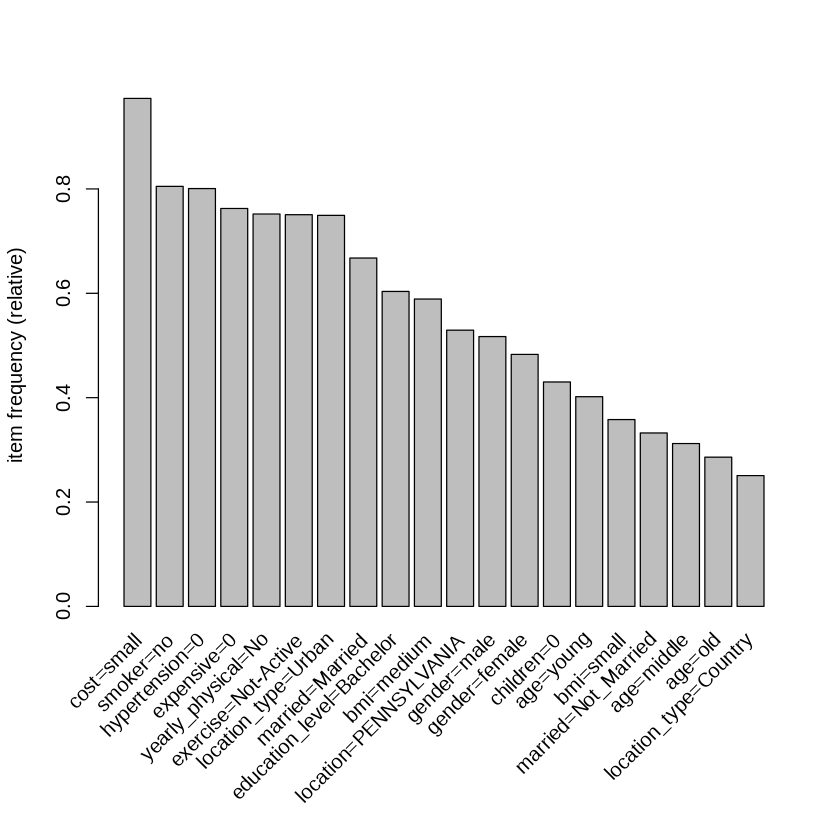

In [51]:
itemFrequencyPlot(dftransactions, topN=20)

###4.7-Create	a	cross	table:

In [52]:
ct	<-	crossTable(dftransactions,	sort=TRUE)
ct[1:14,	1:14]

,cost=small,smoker=no,hypertension=0,expensive=0,yearly_physical=No,exercise=Not-Active,location_type=Urban,married=Married,education_level=Bachelor,bmi=medium,location=PENNSYLVANIA,gender=male,gender=female,children=0
cost=small,7352,6077,5891,5759,5526,5480,5510,4909,4433,4268,3888,3778,3574,3184
smoker=no,6077,6079,4885,5344,4557,4588,4549,4071,3684,3630,3212,3019,3060,2646
hypertension=0,5891,4885,6047,4666,4547,4532,4511,4036,3662,3549,3200,3121,2926,2608
expensive=0,5759,5344,4666,5759,4343,4113,4324,3855,3493,3193,3049,2874,2885,2568
yearly_physical=No,5526,4557,4547,4343,5679,4274,4256,3762,3413,3358,3046,2951,2728,2443
exercise=Not-Active,5480,4588,4532,4113,4274,5669,4262,3816,3410,3345,2984,2920,2749,2429
location_type=Urban,5510,4549,4511,4324,4256,4262,5659,3824,3405,3328,3025,2926,2733,2431
married=Married,4909,4071,4036,3855,3762,3816,3824,5042,3038,2968,2683,2611,2431,2177
education_level=Bachelor,4433,3684,3662,3493,3413,3410,3405,3038,4558,2690,2382,2325,2233,1935
bmi=medium,4268,3630,3549,3193,3358,3345,3328,2968,2690,4448,2372,2311,2137,1941


###4.8-Create association rules:

In [53]:
assocRules <- apriori(dftransactions,
 parameter=list(supp=0.6, conf=0.6),
 control=list(verbose=F),
 appearance=list(default="lhs",rhs=("expensive=0")))

###4.9-Invesitigate the rules:

In [54]:
assocRules
inspect(assocRules)

set of 6 rules 

    lhs                             rhs           support   confidence
[1] {}                           => {expensive=0} 0.7625794 0.7625794 
[2] {hypertension=0}             => {expensive=0} 0.6178496 0.7716223 
[3] {smoker=no}                  => {expensive=0} 0.7076271 0.8790920 
[4] {cost=small}                 => {expensive=0} 0.7625794 0.7833243 
[5] {hypertension=0, cost=small} => {expensive=0} 0.6178496 0.7920557 
[6] {smoker=no, cost=small}      => {expensive=0} 0.7076271 0.8793813 
    coverage  lift     count
[1] 1.0000000 1.000000 5759 
[2] 0.8007150 1.011858 4666 
[3] 0.8049523 1.152787 5344 
[4] 0.9735169 1.027203 5759 
[5] 0.7800583 1.038653 4666 
[6] 0.8046875 1.153167 5344 
